Notebook to plot global mean precipitation rate time series and Hovmoeller diagrams (time vs longitude) of precipitation rate averaged over a latitudinal band

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from Hovmoeller_plot import hovmoller_plot
from aqua import Reader, catalogue
catalogue();

IFS	tco3999-ng5	2.8km experiment, coupled with FESOM
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- interpolated_global	NN interpolation to 5400x2700 grid (lon=[-180,180], lat=[-90, 90])
	- lra-r100-monthly	LRA data monthly at r100
IFS	tco2559-ng5	4km experiment, coupled with FESOM
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- interpolated_global	NN interpolation to 5400x2700 grid (lon=[-180,180], lat=[-90, 90])
	- lra-r100-monthly	LRA data monthly at r100
IFS	tco1279-orca025	9km baseline, coupled to NEMO, deep conv ON
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- lra-r100-monthly	LRA data monthly at r100
IFS	test-tco2559	4km experiment, coupled with FESOM
	- ICMGG_atm2d	2d output
	- ICMU_atm3d	3d output
IFS	test-tco79	TCO79 test data
	- short	original 2d output
	- long	coarse IFS data 1y
IFS	tco25

Read data from LRA and plot global mean precipitation rate. Includes observed precipitationd ata from MSWEP.

2023-06-06 18:00:24 :: Reader :: WARNING  -> You are asking for var ['tprate'] which is already fixed from ['tp'].
2023-06-06 18:00:24 :: Reader :: WARNING  -> Would be safer to run with fix=False
2023-06-06 18:00:26 :: Reader :: WARNING  -> You are asking for var ['tprate'] which is already fixed from ['tp'].
2023-06-06 18:00:26 :: Reader :: WARNING  -> Would be safer to run with fix=False
2023-06-06 18:00:26 :: Reader :: WARNING  -> No fixes available for model IFS, experiment tco2559-ng5-cycle3, source lra-r100-monthly
2023-06-06 18:00:27 :: Reader :: WARNING  -> No fixes available for model IFS, experiment tco1279-orca025-cycle3, source lra-r100-monthly
2023-06-06 18:00:29 :: Reader :: WARNING  -> You are asking for var ['tprate'] which is already fixed from ['pr'].
2023-06-06 18:00:29 :: Reader :: WARNING  -> Would be safer to run with fix=False
2023-06-06 18:00:30 :: Reader :: WARNING  -> You are asking for var ['tprate'] which is already fixed from ['pr'].
2023-06-06 18:00:30 ::

Text(0.5, 1.0, 'global mean precipitation rate')

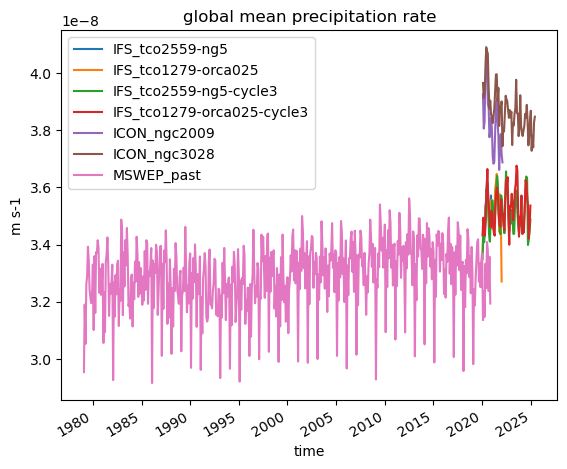

In [11]:
model_list = ["IFS", "ICON", "MSWEP"]
exp_name = {"IFS": ["tco2559-ng5","tco1279-orca025", "tco2559-ng5-cycle3", "tco1279-orca025-cycle3"], "ICON": ["ngc2009", "ngc3028"], "MSWEP": ["past"]}
source = {"IFS": ["lra-r100-monthly"], "ICON": ["lra-r100-monthly"], "MSWEP": ["monthly"]}

data = {}
for model in model_list:
    for exp in exp_name[model]:
        for src in source[model]:
            reader = Reader(model=model, exp=exp, source=src, regrid="r100")
            data[(model, exp)] = reader.retrieve(var="tprate")
            data[(model, exp)] = reader.fldmean(data[(model, exp)]["tprate"])

plt.figure()
for model in model_list:
    for exp in exp_name[model]:
        data[(model, exp)].plot(label=f"{model}_{exp}")
plt.legend()
plt.ylabel("m s-1")
plt.title("global mean precipitation rate")

Now produce Hovmoeller plot of tropical precipitation (time VS lat, to see the latitudinal position of the ITCZ)

tprate [m s**-1]
tprate [m s**-1]
tprate [m s**-1]


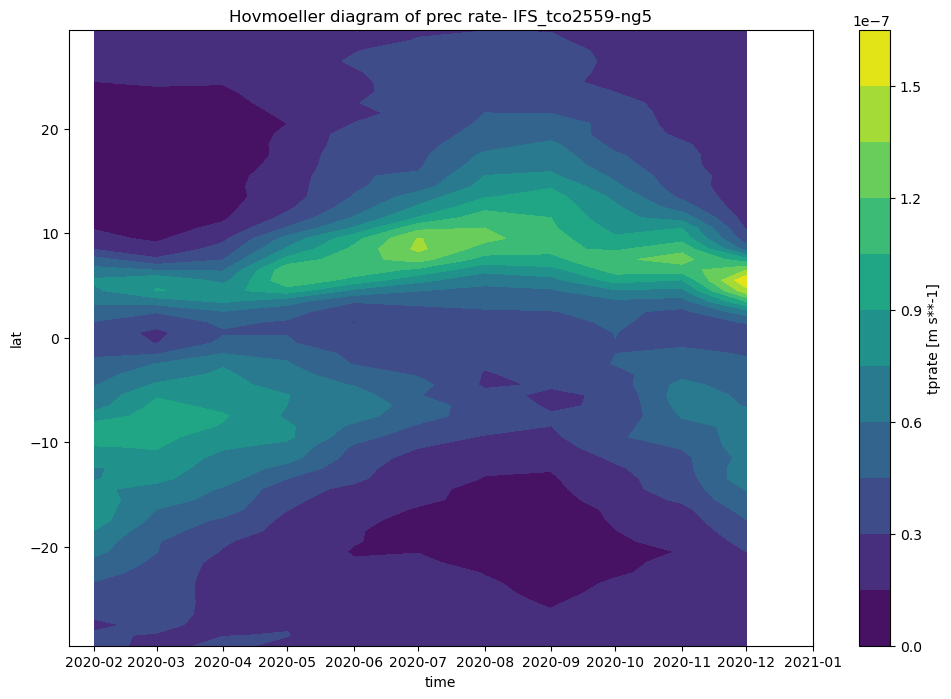

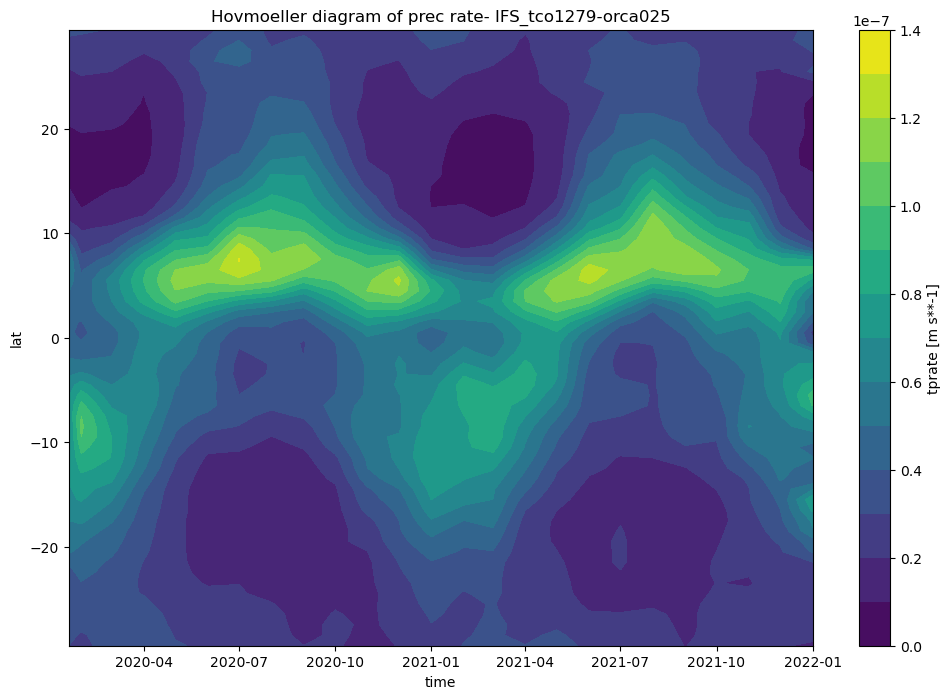

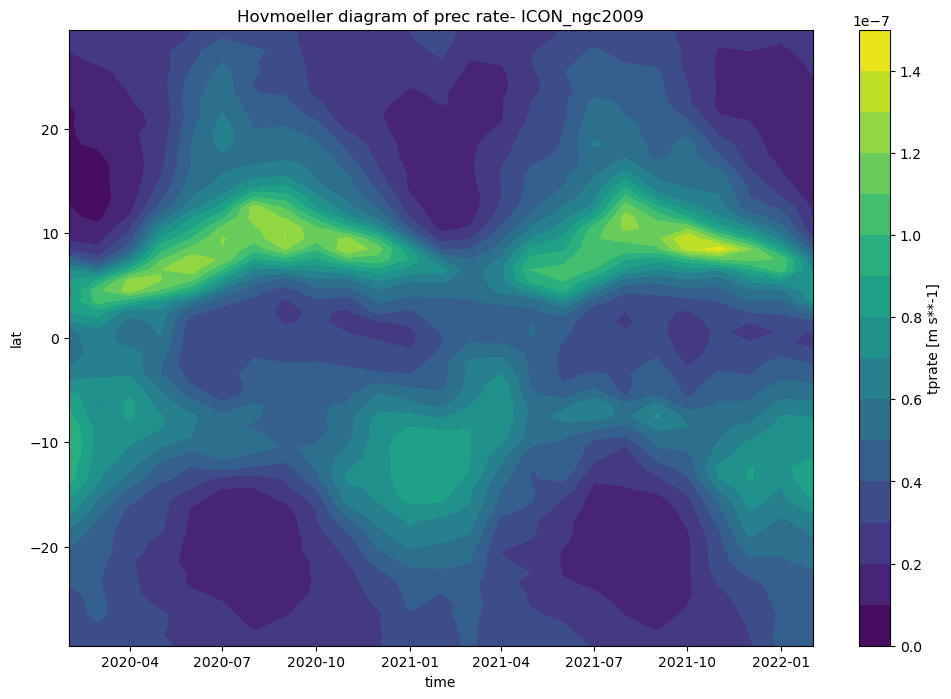

In [6]:
model_list = ["IFS", "ICON"]
exp_name = {"IFS": ["tco2559-ng5","tco1279-orca025"], "ICON": ["ngc2009"]}
source = "lra-r100-monthly"

# boundary lats for averaging, not working correctly (i.e. real lat considered is 90-lat_N)
lat_S=-60
lat_N = +60
data = {}

for model in model_list:
    for exp in exp_name[model]:
        reader = Reader(model=model, exp=exp, source=source)
        data[(model, exp)] = reader.retrieve()["tprate"].isel(lat=slice(lat_N,lat_S))
        hovmoller_plot(data[(model, exp)],dim='lon',invert_axis=False,contour=True,title=f"Hovmoeller diagram of prec rate- {model}_{exp}",levels=13)

Hovmoeller diagram for annual mean observed precipitation (MSWEP)

tprate [m s**-1]


(<Figure size 1200x800 with 2 Axes>,
 <Axes: title={'center': 'Hovmoeller diagram of prec rate - MSWEP'}, xlabel='month', ylabel='lat'>)

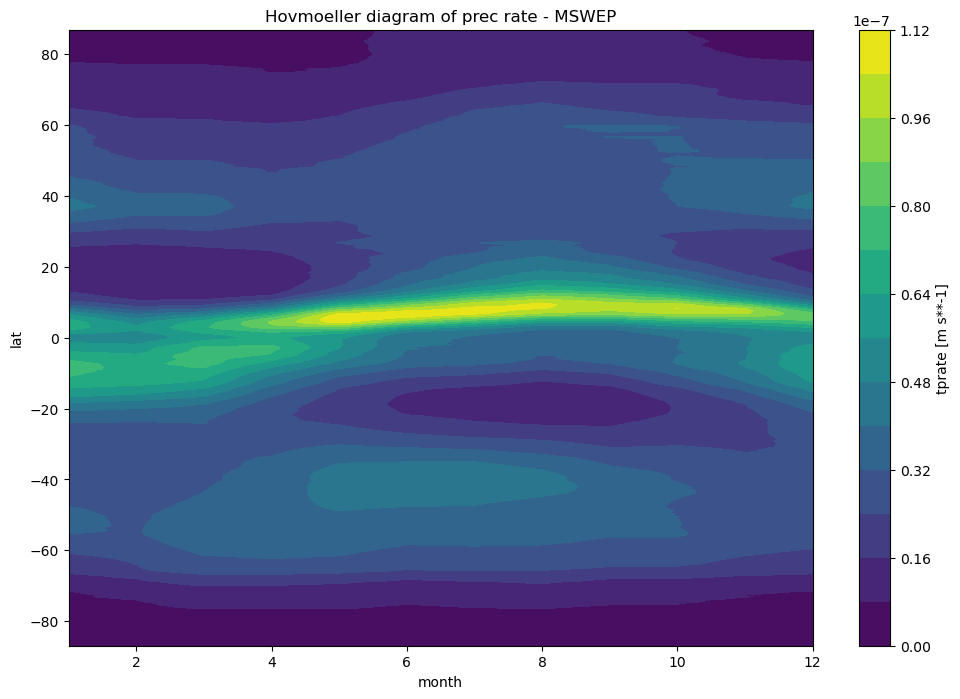

In [7]:
#choose latitudinal band
lat_S=  -30
lat_N = +30

reader = Reader(model="MSWEP", exp="past", source="monthly")#, regrid="r100")
data = reader.retrieve()['tprate'].isel(lat=slice(lat_N,lat_S))

# perform annual mean
climatology = data.groupby("time.month").mean("time")
hovmoller_plot(climatology,dim='lon',invert_axis=False,climatology=True,contour=True,title=f"Hovmoeller diagram of prec rate - MSWEP",levels=13)

Hovmoeller diagram for annual mean precipitation (NextGEMS Cycle3)

2023-06-09 12:56:08 :: Reader :: WARNING  -> No fixes available for model IFS, experiment tco2559-ng5-cycle3, source lra-r100-monthly


{'paramId': '172228', 'dataType': 'fc', 'numberOfPoints': 1038240, 'typeOfLevel': 'surface', 'stepUnits': 1, 'stepType': 'avg', 'gridType': 'regular_ll', 'shortName': 'tprate', 'units': 'm', 'name': 'Total precipitation', 'cfVarName': 'tprate', 'missingValue': 9999, 'totalNumber': 0, 'NV': 0, 'gridDefinitionDescription': 'Latitude/Longitude Grid', 'history': '2023-05-29 14:41:56 variable renamed by AQUA fixer;\n2023-05-29 14:41:56 resampled to frequency 1M by AQUA timmean;\n2023-05-29 14:41:57 regridded by AQUA regridder;\n', 'long_name': 'Mean total precipitation rate'}


2023-06-09 12:56:12 :: Reader :: WARNING  -> No fixes available for model IFS, experiment tco1279-orca025-cycle3, source lra-r100-monthly


tprate [m]
{'paramId': '172228', 'dataType': 'fc', 'numberOfPoints': 1038240, 'typeOfLevel': 'surface', 'stepUnits': 1, 'stepType': 'avg', 'gridType': 'regular_ll', 'shortName': 'tprate', 'units': 'm', 'name': 'Total precipitation', 'cfVarName': 'tprate', 'missingValue': 3.4028234663852886e+38, 'totalNumber': 0, 'NV': 0, 'gridDefinitionDescription': 'Latitude/Longitude Grid', 'history': '2023-05-29 14:53:20 variable renamed by AQUA fixer;\n2023-05-29 14:53:20 resampled to frequency 1M by AQUA timmean;\n2023-05-29 14:53:20 regridded by AQUA regridder;\n', 'long_name': 'Mean total precipitation rate'}
tprate [m]
{'cell_methods': 't: mean', 'long_name': 'Mean total precipitation rate', 'number_of_grid_in_reference': 1, 'param': '52.1.0', 'standard_name': 'pr', 'units': 'm s**-1', 'history': '2023-05-25 11:01:41 variable renamed by AQUA fixer;\n2023-05-25 11:01:52 variable renamed by AQUA fixer;\n2023-05-25 11:01:53 units changed by AQUA fixer;\n2023-05-25 11:45:04 resampled to frequency 1

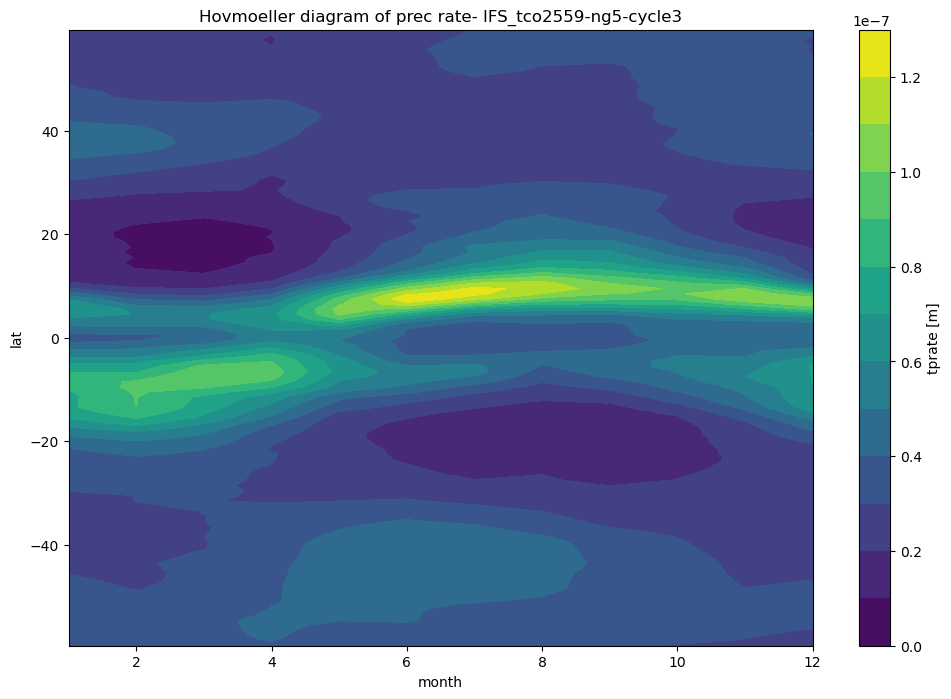

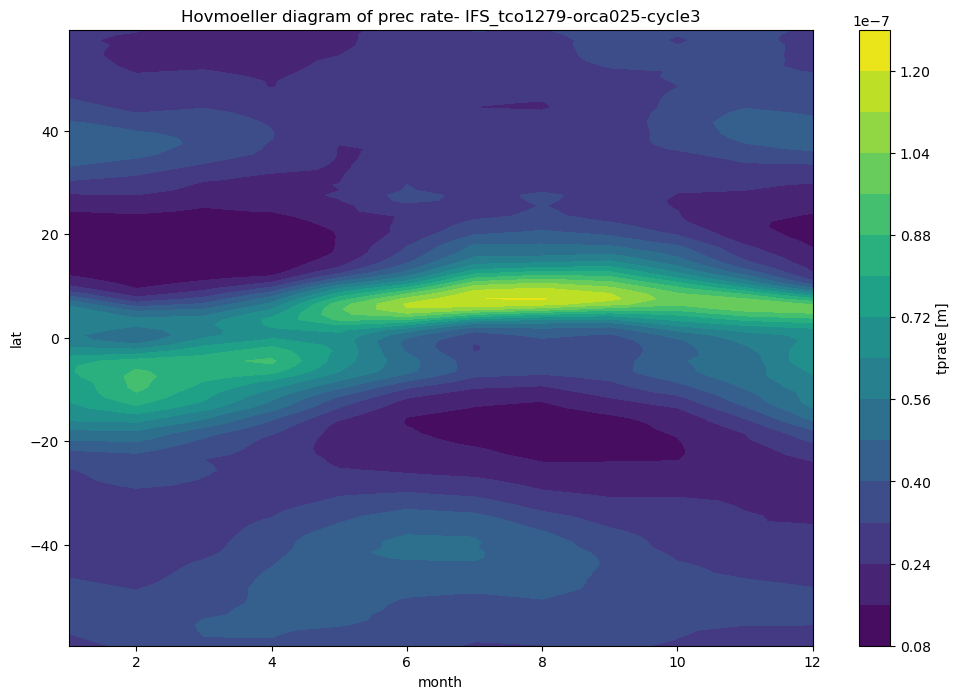

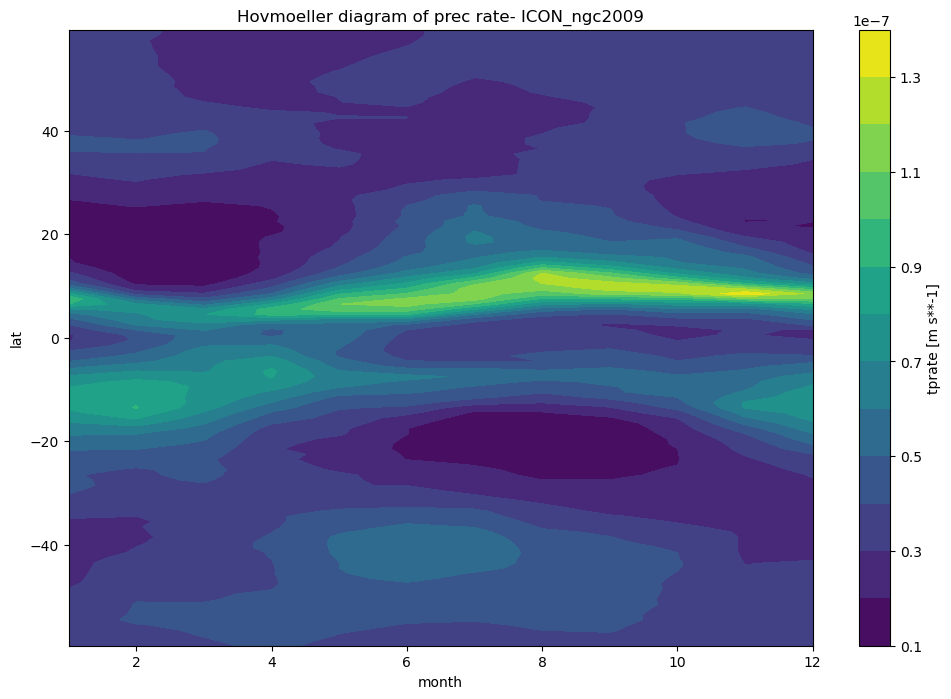

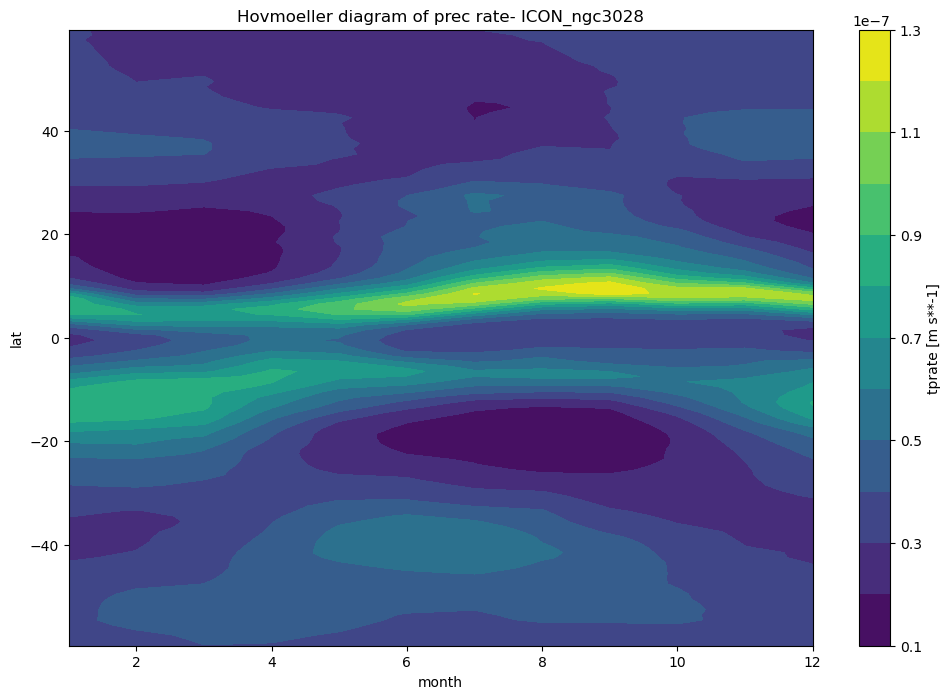

In [10]:
model_list = ["IFS", "ICON"]
exp_name = {"IFS": ["tco2559-ng5-cycle3", "tco1279-orca025-cycle3"], "ICON": ["ngc2009", "ngc3028"]}
source = "lra-r100-monthly"

# boundary lats for averaging
lat_S = -30
lat_N = +30
data = {}

# since the cycle3 simulations are 5 year perform annual mean before plotting Hovmoeller
for model in model_list:
    for exp in exp_name[model]:
        reader = Reader(model=model, exp=exp, source=source)
        data[(model, exp)] = reader.retrieve()['tprate'].isel(lat=slice(lat_N,lat_S))
        data[(model, exp)] = data[(model, exp)].groupby("time.month").mean("time")
        hovmoller_plot(data[(model, exp)],dim='lon',climatology=True,invert_axis=False,contour=True,title=f"Hovmoeller diagram of prec rate- {model}_{exp}",levels=13)